In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6

Load the Ice Age data in the `genosnp` format:

In [28]:
snps = pd.read_table('../clean_data/ice_age.tsv')

In [3]:
genosnp = pd.concat([pd.read_table('../raw_data/ice_age/genosnp_first_500000.gz', sep=' ', header=None, na_values='-'),
                     pd.read_table('../raw_data/ice_age/genosnp_last_454456.gz', sep=' ', header=None, na_values='-')])
genosnp.columns = ['chrom', 'pos', 'id', 'genpos', 'allele0', 'allele1', 'bin', 'gt_string', 'bvalue']

In [4]:
genosnp['end'] = genosnp.pos
genosnp['start'] = genosnp.pos - 1

Ignore sites that don't have a B-value annotation:

In [5]:
genosnp = genosnp.dropna()

# now that the NaNs are gone, bins can be integers
genosnp.bin = genosnp.bin.astype(int)

### Distribution of B-values of the archaic informative sites

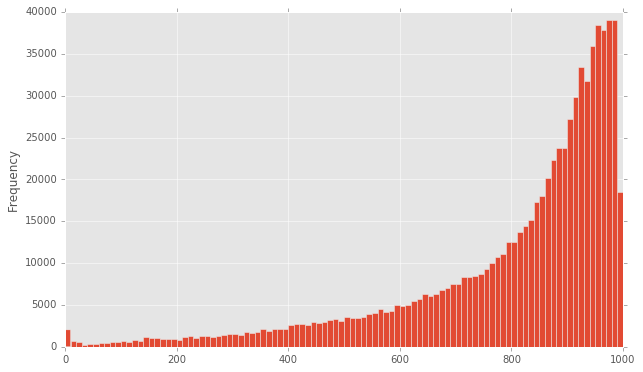

In [29]:
snps.bvalue.plot(kind='hist', xlim=(0, 1000), bins=100)

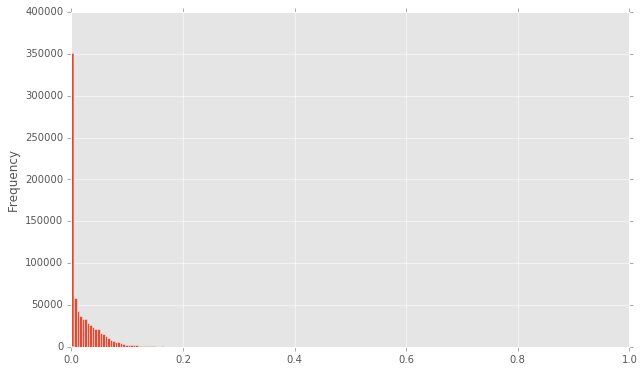

In [30]:
snps.exon_overlap.plot(kind='hist', xlim=(0, 1), bins=100)

Bin the SNPs based on their B value:

In [12]:
n_bins = 10
bin_labels = list(range(n_bins))
our_bins = pd.qcut(snps.bvalue, n_bins, labels=bin_labels).astype(int)

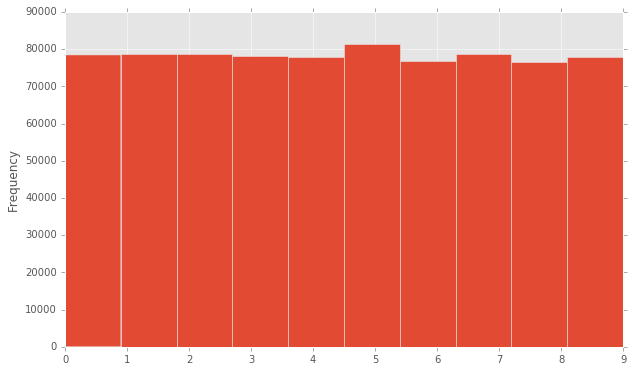

In [13]:
our_bins.plot(kind='hist', xlim=(0, 9))

In [15]:
snps.bin = our_bins

In [31]:
quantiles = snps.bvalue.quantile(np.arange(0, 1, 0.1))

### B-value of a site vs its distance to the nearest exon¶

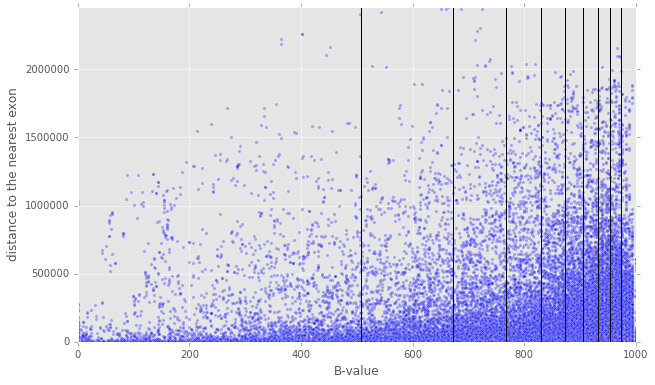

In [32]:
plt.scatter('bvalue', 'exon_distance', data=snps.sample(50000), alpha=0.3, s=10)

plt.xlim(0, 1000)
plt.ylim(0, max(snps.exon_distance))

plt.xlabel('B-value')
plt.ylabel('distance to the nearest exon')

plt.vlines(quantiles, ymin=0, ymax=max(snps.exon_distance))

### B-value of a site vs proportion of exons in its proximity¶

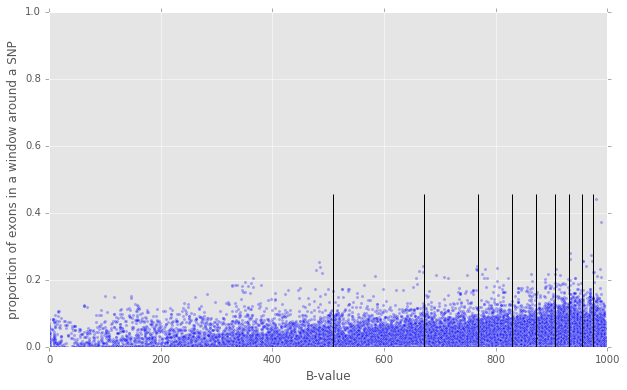

In [33]:
plt.scatter('bvalue', 'exon_overlap', data=snps.sample(50000), alpha=0.3, s=10)

plt.xlim(0, 1000)
plt.ylim(0, 1)

plt.xlabel('B-value')
plt.ylabel('proportion of exons in a window around a SNP')

plt.vlines(quantiles, ymin=0, ymax=max(snps.exon_overlap))

### Mean distance to the nearest exon for any given B-value

In [65]:
avg_distances = genosnp.groupby('bvalue')['exon_distance'].mean()

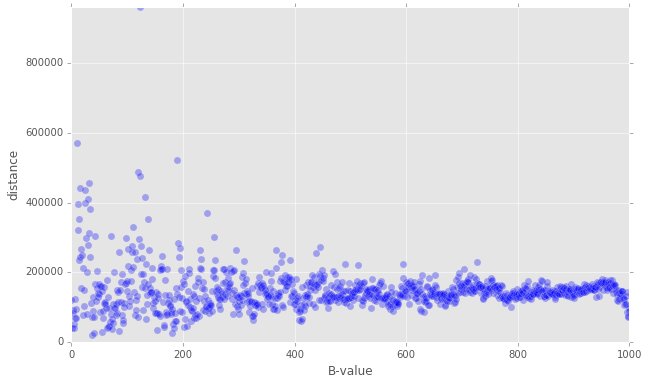

In [66]:
plt.scatter(avg_distances.index, avg_distances, alpha=0.3, s=50)

plt.xlim(0, 1000)
plt.ylim(0, max(avg_distances))

plt.xlabel('B-value')
plt.ylabel('distance')

### Mean distance to the nearest exon for any given B-value *bin*

In [77]:
bin_distances = genosnp.groupby('bin')['exon_distance']

In [80]:
bins = [g.sample(1000) for _, g in bin_distances]

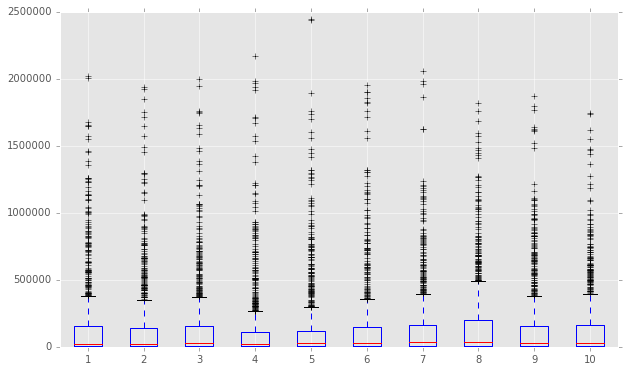

In [91]:
_ = plt.boxplot(bins)

In [87]:
for i in range(10):
    print(i, '\t', genosnp.query('bin == {}'.format(i)).exon_distance.mean())

0 	 147413.915738
1 	 136639.124645
2 	 154414.734639
3 	 135761.896255
4 	 142517.816374
5 	 144946.984192
6 	 151452.106061
7 	 155294.42754
8 	 160474.753579
9 	 130815.549908


In [95]:
for i in range(10):
    print(i, '\t', genosnp.query('bin == {}'.format(i)).exon_distance.median())

0 	 21834.5
1 	 21961.0
2 	 26382.0
3 	 22735.0
4 	 25205.0
5 	 29385.0
6 	 32025.0
7 	 31410.0
8 	 29556.5
9 	 25572.5


In [102]:
for i in range(10):
    print(i, '\t', genosnp.query('bin == {}'.format(i)).exon_distance.quantile(0.1))

0 	 432.3
1 	 483.0
2 	 598.0
3 	 560.0
4 	 624.0
5 	 690.0
6 	 740.0
7 	 711.0
8 	 619.0
9 	 599.0
